# PRCP-1002-HandwrittenDigits

![image](https://miro.medium.com/max/1400/1*26W2Yk3cu2uz_R8BuSb_SA.png)

## DATASET DESCRIPTION

The MNIST (Modified National Institute of Standards and Technology) dataset is a widely used dataset in the field of machine learning and computer vision. It consists of a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9), along with their corresponding labels. The dataset was created for training and testing various machine learning models, particularly for digit recognition tasks.

### * Here are key characteristics of the MNIST dataset:

#### * Image Size:
Each image in the dataset is 28 pixels in height and 28 pixels in width, resulting in a total of 784 pixels. Each pixel has a grayscale value ranging from 0 to 255. 

#### * Number of Classes:
There are 10 classes in the dataset, corresponding to the digits 0 through 9.

#### * Training and Test Sets:
The dataset is typically divided into a training set and a test set. The training set is used to train machine learning models, while the test set is used to evaluate their performance on unseen data.

#### * Number of Samples:
The original MNIST dataset consists of 60,000 training images and 10,000 test images. Each image is associated with a label indicating the digit it represents.

#### * Task:
The main task associated with the MNIST dataset is digit recognition. Given an image, the goal is to correctly classify it into one of the 10 digit classes.

#### * Complexity:
While MNIST is considered a relatively simple dataset compared to more modern datasets, it has served as a benchmark for testing and developing various machine learning and deep learning algorithms. Achieving high accuracy on MNIST is a fundamental step for researchers and practitioners in the field.

#### * Usage:
MNIST has been widely used for educational purposes, benchmarking algorithms, and exploring the capabilities of different machine learning models. It is often used as a starting point for individuals learning about image classification and deep learning.


## IMPORTING LIBRARIES


In [1]:
# Importing the MNIST dataset from TensorFlow.Keras
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

# Importing specific modules from TensorFlow.Keras for building neural networks
from tensorflow.keras import layers, models

#SVM
from sklearn import svm

#KNN
from sklearn.neighbors import KNeighborsClassifier

#model evaluation
from sklearn.metrics import accuracy_score, mean_squared_error

# The warnings library is used to suppress unnecessary warnings during execution
import warnings
warnings.filterwarnings('ignore')

## LOADING DATASET

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
print("Total Number of image for training:", y_train.shape[0], 
     "\nTotal Number of image for testing:", y_test.shape[0])

Total Number of image for training: 60000 
Total Number of image for testing: 10000


### DATA VISUALIZATION 

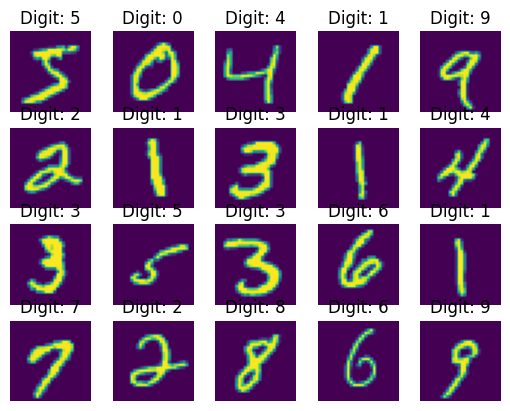

In [4]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f'Digit: {y_train[i]}')
    plt.axis('off')

plt.show()


## DATA PREPROCESSING

In [5]:
# Preprocess the data by reshaping the images and normalizing pixel values

# The new shape is (number of images, height, width, channels)
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255

# Reshaping the testing images in a similar manner
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Normalizing pixel values to the range [0, 1] by dividing by 255
# This step helps the neural network converge faster during training

In [6]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## MODEL BUILDING 

### Neural Network (Feedforward) using TensorFlow/Keras:


In [8]:
# Flatten the images to 1D arrays
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Normalize pixel values to be between 0 and 1
X_train_flat, X_test_flat = X_train_flat / 255.0, X_test_flat / 255.0

# Build a simple FNN model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_flat, y_train, epochs=10, validation_data=(X_test_flat, y_test))




Epoch 1/10


1875/1875 [==============================] - 9s 4ms/step - loss: 1.2242 - accuracy: 0.6947 - val_loss: 0.6181 - val_accuracy: 0.8553
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5452 - accuracy: 0.8520 - val_loss: 0.4160 - val_accuracy: 0.8940
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4277 - accuracy: 0.8789 - val_loss: 0.3516 - val_accuracy: 0.9052
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3771 - accuracy: 0.8918 - val_loss: 0.3174 - val_accuracy: 0.9115
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3449 - accuracy: 0.9001 - val_loss: 0.2939 - val_accuracy: 0.9159
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3215 - accuracy: 0.9055 - val_loss: 0.2765 - val_accuracy: 0.9197
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3062 - accuracy: 0.9116 - val_loss: 0.2626 - val_accur

## MODEL EVALUATION

In [9]:
test_loss, test_acc = model.evaluate(X_test_flat, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2299 - accuracy: 0.9324
Test accuracy: 0.9323999881744385


### Support Vector Machine (SVM) using Scikit-learn


In [10]:
# Reshape data for SVM
X_train_svm = X_train.reshape((60000, 28 * 28))
X_test_svm = X_test.reshape((10000, 28 * 28))

# Build and train SVM model
model_svm = svm.SVC()
model_svm.fit(X_train_svm, y_train)

# Make predictions
y_pred_svm = model_svm.predict(X_test_svm)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)



SVM Accuracy: 0.9792


### K-Nearest Neighbors (KNN) using Scikit-learn:


In [11]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
# Reshape data for KNN
X_train_knn = X_train.reshape((60000, 28 * 28))
X_test_knn = X_test.reshape((10000, 28 * 28))

# Build and train KNN model
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_knn, y_train)

# Make predictions
y_pred_knn = model_knn.predict(X_test_knn)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.9705


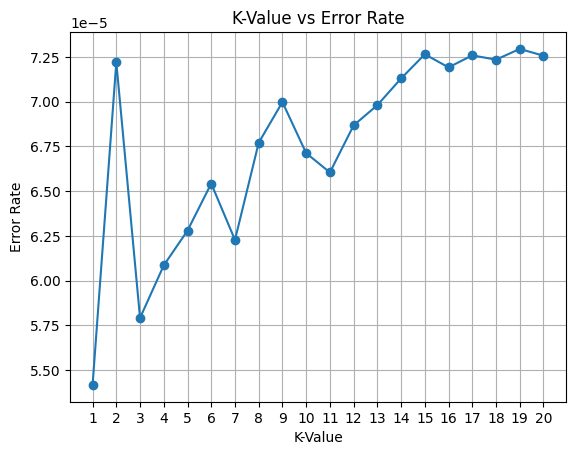

In [13]:
# Vary the k-values
k_values = list(range(1, 21))  # Adjust the range of k-values as needed

# Lists to store error rates
error_rates = []

for k in k_values:
    # Build and train KNN model for each k-value
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train_knn, y_train)

    # Make predictions
    y_pred_knn = model_knn.predict(X_test_knn)

    # Calculate error rate (in this case, using mean squared error)
    mse = mean_squared_error(y_test, y_pred_knn)
    error_rate = mse / len(y_test)
    
    # Alternatively, you can use accuracy as an error rate
    # error_rate = 1 - accuracy_score(y_test, y_pred_knn)

    error_rates.append(error_rate)

# Plot k-values vs error rates
plt.plot(k_values, error_rates, marker='o')
plt.title('K-Value vs Error Rate')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### Convolutional Neural Network (CNN) using TensorFlow/Keras:


In [14]:
# Load and preprocess data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Build CNN model
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(64, activation='relu'))
model_cnn.add(layers.Dense(10, activation='softmax'))

# Compile and train the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))



Epoch 1/5
938/938 [==============================] - 17s 17ms/step - loss: 0.1980 - accuracy: 0.9449 - val_loss: 0.0827 - val_accuracy: 0.9759
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0686 - accuracy: 0.9800 - val_loss: 0.0609 - val_accuracy: 0.9793
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 0.0505 - val_accuracy: 0.9840
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0467 - val_accuracy: 0.9853
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.0413 - val_accuracy: 0.9860


In [15]:
# Evaluate the CNN model
eval_cnn = model_cnn.evaluate(X_test, y_test, verbose=2)

print("CNN Evaluation:")
print("Test Loss:", eval_cnn[0])
print("Test Accuracy:", eval_cnn[1])


313/313 - 1s - loss: 0.0413 - accuracy: 0.9860 - 1s/epoch - 4ms/step
CNN Evaluation:
Test Loss: 0.04131583869457245
Test Accuracy: 0.9860000014305115


Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0421 - val_accuracy: 0.9866
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0572 - val_accuracy: 0.9825
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0553 - val_accuracy: 0.9835
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0589 - val_accuracy: 0.9827
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0546 - val_accuracy: 0.9865


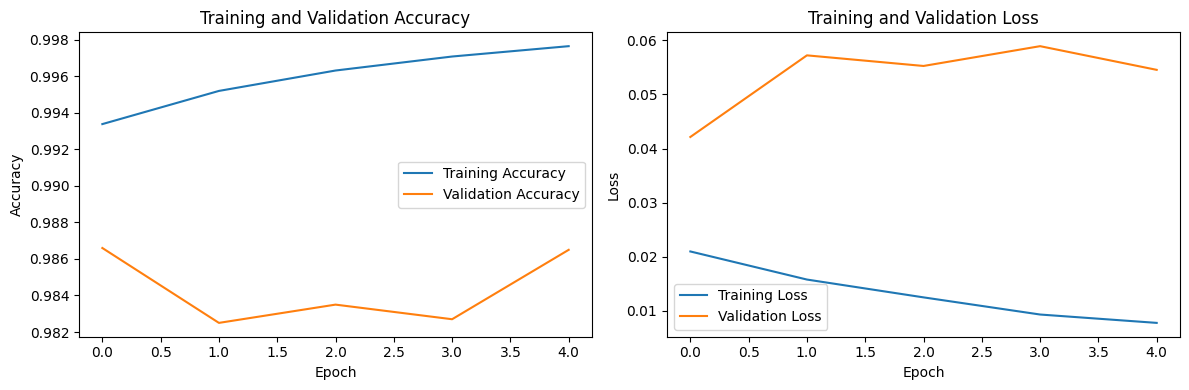

In [16]:
# Train the model and store the training history
history_cnn = model_cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 174ms/step


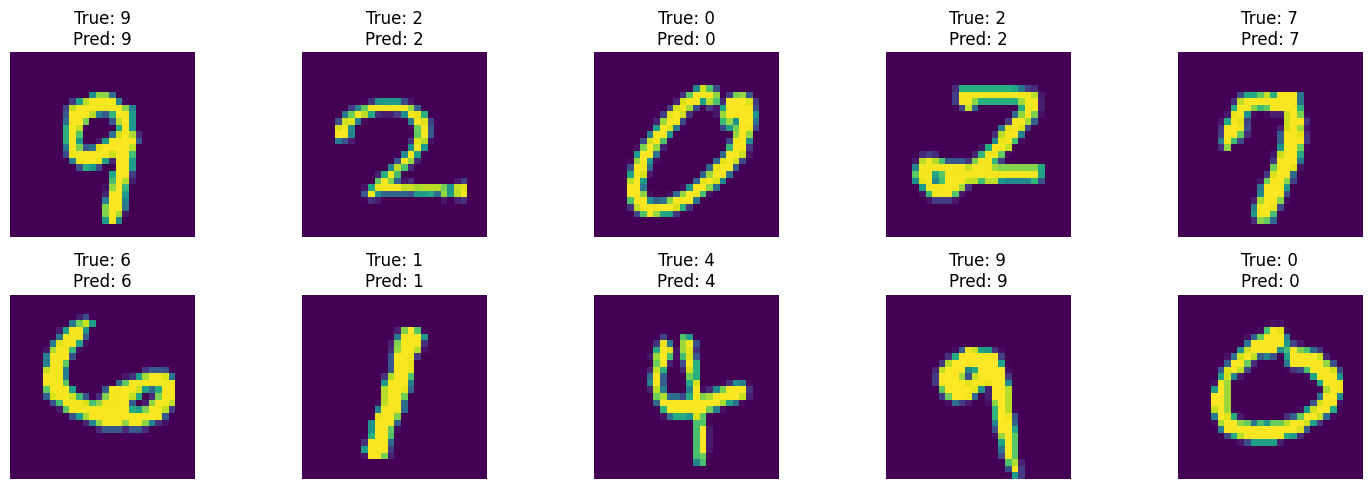

In [17]:
# Get predictions for a random sample of test images
num_samples = 10  # Adjust the number of samples to display
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[random_indices]
sample_labels_true = y_test[random_indices]
sample_labels_pred = model_cnn.predict(sample_images)

# Convert one-hot encoded labels to integers
labels_true = np.argmax(sample_labels_true, axis=1)
labels_pred = np.argmax(sample_labels_pred, axis=1)

# Plot the images along with their predicted and true labels
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28))
    plt.title(f'True: {labels_true[i]}\nPred: {labels_pred[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## CONCLUSION:

#### CNN
* The model gives highest accuracy score of 98%. Overall, considering the balance between model complexity and performance, we conclude that CNN is the best working model for this specific task."

#### KNN & SVM 
* Both gives the almost same accuracy score of 97%.